<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Gene-Relationships-through-Various-Network-Visualization-Approaches" data-toc-modified-id="Understanding-Gene-Relationships-through-Various-Network-Visualization-Approaches-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Gene Relationships through Various Network Visualization Approaches</a></span><ul class="toc-item"><li><span><a href="#Achilles-Data" data-toc-modified-id="Achilles-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Achilles Data</a></span></li><li><span><a href="#Gene-Effect-(NNMD---Null-Normalized-Mean-Difference)" data-toc-modified-id="Gene-Effect-(NNMD---Null-Normalized-Mean-Difference)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gene Effect (NNMD - Null-Normalized Mean Difference)</a></span></li><li><span><a href="#Gene-Dependency" data-toc-modified-id="Gene-Dependency-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gene Dependency</a></span></li><li><span><a href="#Zero-ing-Out-Probabilities-below-0.5" data-toc-modified-id="Zero-ing-Out-Probabilities-below-0.5-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Zero-ing Out Probabilities below 0.5</a></span></li><li><span><a href="#DepMap-Cell-Line-Metadata" data-toc-modified-id="DepMap-Cell-Line-Metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>DepMap Cell Line Metadata</a></span></li><li><span><a href="#Gene-Dependency-Ranks-by-Cell-Line" data-toc-modified-id="Gene-Dependency-Ranks-by-Cell-Line-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Gene Dependency Ranks by Cell Line</a></span></li><li><span><a href="#Calculating-Correlation-Matrix-for-Cell-Lines" data-toc-modified-id="Calculating-Correlation-Matrix-for-Cell-Lines-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Calculating Correlation Matrix for Cell Lines</a></span></li></ul></li><li><span><a href="#This-code-continues-on-Google-Collab-here" data-toc-modified-id="This-code-continues-on-Google-Collab-here-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><a href="https://colab.research.google.com/drive/1MJbvuvzVhiKs9dUJj78jkldzDDZl_W7c" target="_blank">This code continues on Google Collab here</a></a></span><ul class="toc-item"><li><span><a href="#Computing-rank-divergence-correlations" data-toc-modified-id="Computing-rank-divergence-correlations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Computing rank divergence correlations</a></span><ul class="toc-item"><li><span><a href="#Mean-rank-divergence" data-toc-modified-id="Mean-rank-divergence-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Mean rank divergence</a></span></li><li><span><a href="#Median-Rank-Divergence" data-toc-modified-id="Median-Rank-Divergence-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Median Rank Divergence</a></span></li></ul></li><li><span><a href="#Grouping-Cell-Lines-by-Cancer-Type" data-toc-modified-id="Grouping-Cell-Lines-by-Cancer-Type-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Grouping Cell Lines by Cancer Type</a></span></li><li><span><a href="#Cell-Line-Ranks-by-Gene-Dependency" data-toc-modified-id="Cell-Line-Ranks-by-Gene-Dependency-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cell Line Ranks by Gene Dependency</a></span></li><li><span><a href="#Gene-Correlation-Matrix" data-toc-modified-id="Gene-Correlation-Matrix-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gene Correlation Matrix</a></span></li></ul></li></ul></div>

# Understanding Gene Relationships through Various Network Visualization Approaches

In [1]:
import pandas as pd

In [2]:
from statistics import *

In [3]:
import netrd as net

In [4]:
from scipy import stats

In [5]:
import random

In [6]:
from datetime import datetime

In [7]:
# viz:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set_palette("Set1")

## Achilles Data
Source: [DepMap](https://depmap.org/portal/achilles/)

Download portal: [Achilles](https://depmap.org/portal/download/all/)

## Gene Effect (NNMD - Null-Normalized Mean Difference)

In [9]:
start_time = datetime.now()
gene_effect = pd.read_csv('data/achilles_gene_effect.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:08.550918


In [10]:
gene_effect.shape

(625, 18333)

In [11]:
gene_effect.head(5)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.168684,0.089128,-0.196966,-0.021260,0.038541,-0.175141,0.349346,-0.441008,0.291208,0.147993,...,-0.135665,-0.461810,NaN,NaN,0.253495,0.233904,-0.406140,0.283878,0.230978,-0.135112
ACH-000005,-0.068759,0.218792,0.178252,0.158390,-0.193862,-0.324566,0.246220,-0.576495,-0.081217,0.016182,...,-0.176432,-0.391199,-0.182117,-0.108978,0.186545,-0.075884,-0.095781,0.029269,0.000945,-0.242038
ACH-000007,0.053893,0.081444,-0.060170,0.153435,0.087362,0.150684,0.061146,-0.470462,-0.012210,0.277616,...,-0.101852,-0.276755,-0.030821,0.121126,0.214875,-0.019300,-0.342632,0.083610,-0.392722,-0.443380
ACH-000009,0.059874,-0.011153,-0.054367,0.060886,0.039767,0.043527,0.011845,-0.630290,0.161797,0.033587,...,-0.355880,-0.290047,-0.031825,0.115886,0.116784,0.035294,-0.575523,0.228940,-0.114559,-0.549906
ACH-000011,0.277165,0.085354,0.007972,0.445843,-0.036717,-0.261409,0.111173,-0.430867,0.138193,0.120785,...,-0.418769,-0.518908,-0.128187,-0.126336,0.269698,0.148516,-0.227106,0.120656,-0.252444,-0.401821


In [12]:
stats.describe(gene_effect[random.choice(list(gene_effect.columns))])

DescribeResult(nobs=625, minmax=(-0.36592566849200003, 0.561660384578), mean=0.13790275446289615, variance=0.010661809345429997, skewness=-0.03650378160517338, kurtosis=1.8915034287789183)

Visualizing NNMD Distributions of 100 random genes from gene_effect data


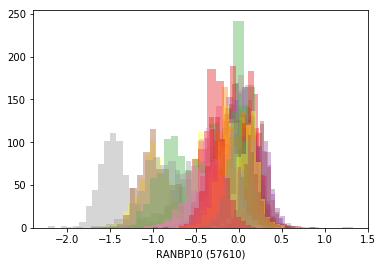

In [13]:
print('Visualizing NNMD Distributions of 100 random genes from gene_effect data')
for g in random.sample(list(gene_effect.columns), 100):
    sns.distplot(gene_effect[g].fillna(0),bins=20,kde=False)

In [14]:
gene_effect.min().min()

-4.4923381539

In [15]:
gene_effect.min().sort_values(ascending=True).head(5)

RAN (5901)          -4.492338
BUB3 (9184)         -3.961129
HIST2H3A (333932)   -3.888375
HSPE1 (3336)        -3.634067
EEF2 (1938)         -3.522135
dtype: float64

In [16]:
gene_effect.max().max()

6.384527418539999

In [17]:
gene_effect.max().sort_values(ascending=False).head(5)

PTEN (5728)         6.384527
TP53 (7157)         4.831093
ARRDC3 (57561)      3.974578
GPAT4 (137964)      3.070844
NPIPB15 (440348)    3.054422
dtype: float64

In [18]:
pd.DataFrame(gene_effect.dtypes)

,0
A1BG (1),float64
A1CF (29974),float64
A2M (2),float64
A2ML1 (144568),float64
A3GALT2 (127550),float64
A4GALT (53947),float64
A4GNT (51146),float64
AAAS (8086),float64
AACS (65985),float64
AADAC (13),float64


## Gene Dependency
**Note:** We chose to use the `gene dependency` data set instead of the `gene effect` data set because the `gene effect` data set is the CERES score with a Null-Normalized Mean Difference (difference from the null model of cell line survival), whereas the `gene dependency` data set is a simple probability ( 0 < p < 1 ) of importance from the null model of cell line survival. Learn more at the [DepMap FAQs](https://depmap.org/portal/faq/)

In [19]:
start_time = datetime.now()
gene_dep = pd.read_csv('data/achilles_gene_dependency.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:10.107633


In [20]:
gene_dep.shape

(625, 18333)

In [21]:
gene_dep.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.001451,0.004520,0.102872,0.018067,0.008767,0.085647,0.000065,0.431382,0.000192,0.001974,...,0.060016,0.465022,NaN,NaN,0.000372,0.000517,0.374798,0.000220,0.000541,0.059707
ACH-000005,0.026104,0.001092,0.001859,0.002384,0.073250,0.175472,0.000745,0.528323,0.029178,0.011600,...,0.064166,0.252776,0.067042,0.037138,0.001671,0.027810,0.033134,0.010160,0.013513,0.103597
ACH-000007,0.004364,0.003030,0.017460,0.001112,0.002801,0.001155,0.003964,0.432981,0.009979,0.000158,...,0.027625,0.137708,0.012447,0.001760,0.000440,0.010849,0.219132,0.002946,0.296057,0.383729
ACH-000009,0.002986,0.008234,0.014550,0.002942,0.004015,0.003802,0.005994,0.671296,0.000620,0.004395,...,0.240007,0.154809,0.010861,0.001271,0.001252,0.004284,0.592691,0.000227,0.030041,0.552916
ACH-000011,0.000254,0.003716,0.009770,0.000015,0.016456,0.131691,0.002650,0.350667,0.001843,0.002332,...,0.331856,0.493477,0.042943,0.042179,0.000285,0.001603,0.101851,0.002336,0.123363,0.306065
ACH-000012,0.006585,0.000650,0.002101,0.000076,0.005949,0.039098,0.000148,0.496048,0.002616,0.000075,...,0.316770,0.903348,0.003081,0.013213,0.001073,0.001261,0.037322,0.003660,0.058364,0.332458
ACH-000013,0.004887,0.006845,0.020258,0.000569,0.027806,0.028374,0.005170,0.505162,0.007531,0.000194,...,0.010434,0.001892,0.024174,0.019491,0.000312,0.017229,0.079498,0.001365,0.107523,0.619927
ACH-000014,0.001156,0.012898,0.007196,0.000637,0.012610,0.027250,0.044594,0.451602,0.019987,0.000854,...,0.069487,0.932838,NaN,NaN,0.018422,0.006032,0.067962,0.017100,0.000352,0.204259
ACH-000015,0.026106,0.007272,0.072215,0.001568,0.012737,0.036572,0.000224,0.290348,0.000692,0.000250,...,0.030156,0.115563,0.015421,0.009875,0.000063,0.000555,0.151136,0.000561,0.160490,0.089013
ACH-000017,0.000980,0.002869,0.028000,0.002748,0.100577,0.054300,0.000285,0.322310,0.010416,0.001041,...,0.083403,0.715688,0.020735,0.000497,0.003282,0.003351,0.127736,0.000280,0.209408,0.148503


Visualizing Probability Distributions of 100 random genes from gene_dependency data


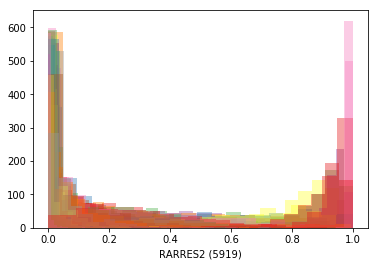

In [22]:
print('Visualizing Probability Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(gene_dep.columns), 100):
    sns.distplot(gene_dep[g].fillna(0),bins=20,kde=False)

In [23]:
gene_dep_no_thresh = gene_dep.copy()

## Zero-ing Out Probabilities below 0.5

In [26]:
gene_dep[gene_dep<0.5]=0

In [27]:
gene_dep= gene_dep.fillna(0)

In [28]:
gene_dep.min().sort_values(ascending=True).head(5)

A1BG (1)            0.0
PPP1R12C (54776)    0.0
PPP1R13B (23368)    0.0
PPP1R13L (10848)    0.0
PPP1R14A (94274)    0.0
dtype: float64

In [29]:
gene_dep.max().sort_values(ascending=False).head(5)

CHMP3 (51652)     1.0
RPL12 (6136)      1.0
RPAP2 (79871)     1.0
CHMP6 (79643)     1.0
SMARCB1 (6598)    1.0
dtype: float64

## DepMap Cell Line Metadata

In [30]:
cell_lines = pd.read_csv('data/depmap-2019q1-celllines_v2.csv',index_col=0)

In [31]:
cell_lines.head(5)

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC


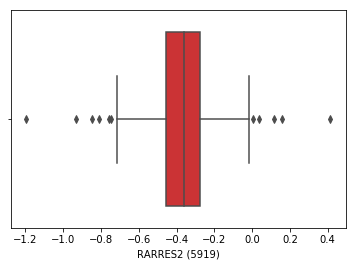

In [32]:
sns.boxplot(gene_effect[g].reset_index()[g])

In [33]:
lines_in_ge = list(gene_effect.index)

In [34]:
# Filter cell lines metadata to only cell lines in the gene effect dataset
metadata = cell_lines[cell_lines.index.isin(list(gene_effect.index))]

In [35]:
metadata.to_pickle('data/filtered_cell_lines_metadata.pkl')

In [36]:
metadata.to_csv('data/filtered_cell_lines_metadata.csv')

**Code rest stop: load filtered metadata**

In [37]:
metadata = pd.read_pickle('data/filtered_cell_lines_metadata.pkl')

In [38]:
metadata.columns

Index(['CCLE_Name', 'Aliases', 'COSMIC_ID', 'Sanger ID', 'Primary Disease',
       'Subtype Disease', 'Gender', 'Source'],
      dtype='object')

In [39]:
metadata.shape

(622, 8)

In [40]:
diseases = pd.DataFrame(metadata.reset_index().groupby('Primary Disease').count()).filter(['DepMap_ID']).sort_values(by='DepMap_ID', ascending=True)

In [41]:
diseases

,DepMap_ID
Primary Disease,
Prostate Cancer,1
Gallbladder Cancer,1
Fibroblast,1
Thyroid Cancer,2
Eye Cancer,2
Cervical Cancer,4
Bile Duct Cancer,5
Rhabdoid,10
Myeloma,16


<BarContainer object of 28 artists>

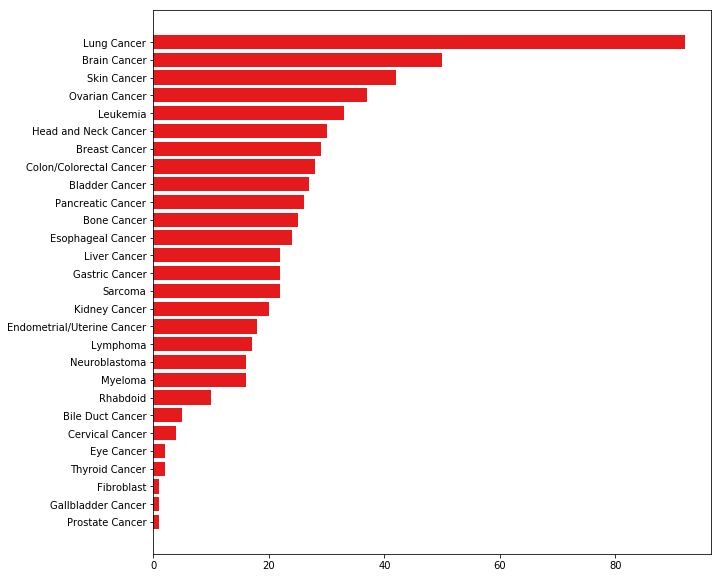

In [42]:
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(diseases.index,diseases['DepMap_ID'])

In [43]:
metadata

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC
ACH-000007,LS513_LARGE_INTESTINE,LS513,907795.0,569.0,Colon/Colorectal Cancer,Colon Carcinoma,Male,ATCC
ACH-000009,C2BBE1_LARGE_INTESTINE,C2BBe1,910700.0,2104.0,Colon/Colorectal Cancer,Colon Adenocarcinoma,Male,ATCC
ACH-000011,253J_URINARY_TRACT,253J,NaN,NaN,Bladder Cancer,Carcinoma,NaN,KCLB
ACH-000012,HCC827_LUNG,HCC827,1240146.0,354.0,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",Female,ATCC
ACH-000013,ONCODG1_OVARY,ONCO-DG-1,NaN,NaN,Ovarian Cancer,Adenocarcinoma,Female,DSMZ
ACH-000014,HS294T_SKIN,Hs 294T;A101D;Hs 294.T,NaN,NaN,Skin Cancer,Melanoma,Male,ATCC
ACH-000015,NCIH1581_LUNG,NCI-H1581;NCI-H2077,908471.0,1237.0,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Large Cell...",Male,ATCC


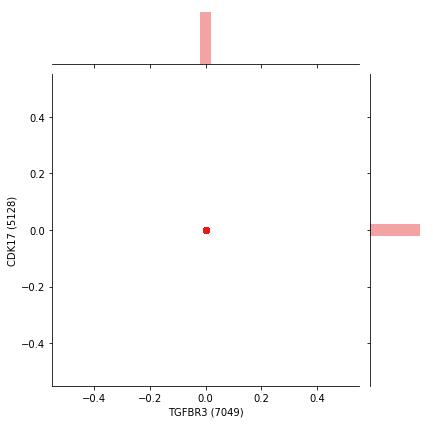

In [44]:
x=random.choice(list(gene_dep.columns))
y=random.choice(list(gene_dep.columns))
g = sns.jointplot(x=x, y=y, data=gene_dep)
g.set_axis_labels(x,y)

## Gene Dependency Ranks by Cell Line

In [45]:
ranks = pd.DataFrame(index=gene_dep.columns, columns=list(gene_dep.index))

In [46]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep.loc[cell_line].rank().head(10)

A1BG (1)            8117.5
A1CF (29974)        8117.5
A2M (2)             8117.5
A2ML1 (144568)      8117.5
A3GALT2 (127550)    8117.5
A4GALT (53947)      8117.5
A4GNT (51146)       8117.5
AAAS (8086)         8117.5
AACS (65985)        8117.5
AADAC (13)          8117.5
Name: ACH-000570, dtype: float64

In [47]:
# Calculate gene dependency ranks for each cell line
start_time = datetime.now()
i=1
r=list(gene_dep.index)
l=len(r)
for cell_line in r:
    print('analyzing cell line',cell_line,i,"of",l)
    ranks[cell_line]=gene_dep.loc[cell_line].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

analyzing cell line ACH-000004 1 of 625
analyzing cell line ACH-000005 2 of 625
analyzing cell line ACH-000007 3 of 625
analyzing cell line ACH-000009 4 of 625
analyzing cell line ACH-000011 5 of 625
analyzing cell line ACH-000012 6 of 625
analyzing cell line ACH-000013 7 of 625
analyzing cell line ACH-000014 8 of 625
analyzing cell line ACH-000015 9 of 625
analyzing cell line ACH-000017 10 of 625
analyzing cell line ACH-000018 11 of 625
analyzing cell line ACH-000019 12 of 625
analyzing cell line ACH-000021 13 of 625
analyzing cell line ACH-000022 14 of 625
analyzing cell line ACH-000025 15 of 625
analyzing cell line ACH-000028 16 of 625
analyzing cell line ACH-000029 17 of 625
analyzing cell line ACH-000030 18 of 625
analyzing cell line ACH-000035 19 of 625
analyzing cell line ACH-000036 20 of 625
analyzing cell line ACH-000037 21 of 625
analyzing cell line ACH-000039 22 of 625
analyzing cell line ACH-000040 23 of 625
analyzing cell line ACH-000041 24 of 625
analyzing cell line ACH-0

analyzing cell line ACH-000414 200 of 625
analyzing cell line ACH-000415 201 of 625
analyzing cell line ACH-000416 202 of 625
analyzing cell line ACH-000420 203 of 625
analyzing cell line ACH-000421 204 of 625
analyzing cell line ACH-000422 205 of 625
analyzing cell line ACH-000424 206 of 625
analyzing cell line ACH-000425 207 of 625
analyzing cell line ACH-000426 208 of 625
analyzing cell line ACH-000427 209 of 625
analyzing cell line ACH-000433 210 of 625
analyzing cell line ACH-000434 211 of 625
analyzing cell line ACH-000436 212 of 625
analyzing cell line ACH-000437 213 of 625
analyzing cell line ACH-000444 214 of 625
analyzing cell line ACH-000445 215 of 625
analyzing cell line ACH-000448 216 of 625
analyzing cell line ACH-000450 217 of 625
analyzing cell line ACH-000452 218 of 625
analyzing cell line ACH-000454 219 of 625
analyzing cell line ACH-000458 220 of 625
analyzing cell line ACH-000459 221 of 625
analyzing cell line ACH-000460 222 of 625
analyzing cell line ACH-000461 223

analyzing cell line ACH-000788 396 of 625
analyzing cell line ACH-000790 397 of 625
analyzing cell line ACH-000791 398 of 625
analyzing cell line ACH-000792 399 of 625
analyzing cell line ACH-000793 400 of 625
analyzing cell line ACH-000794 401 of 625
analyzing cell line ACH-000796 402 of 625
analyzing cell line ACH-000799 403 of 625
analyzing cell line ACH-000800 404 of 625
analyzing cell line ACH-000801 405 of 625
analyzing cell line ACH-000802 406 of 625
analyzing cell line ACH-000804 407 of 625
analyzing cell line ACH-000805 408 of 625
analyzing cell line ACH-000809 409 of 625
analyzing cell line ACH-000810 410 of 625
analyzing cell line ACH-000811 411 of 625
analyzing cell line ACH-000817 412 of 625
analyzing cell line ACH-000819 413 of 625
analyzing cell line ACH-000820 414 of 625
analyzing cell line ACH-000821 415 of 625
analyzing cell line ACH-000822 416 of 625
analyzing cell line ACH-000823 417 of 625
analyzing cell line ACH-000824 418 of 625
analyzing cell line ACH-000827 419

analyzing cell line ACH-001532 601 of 625
analyzing cell line ACH-001536 602 of 625
analyzing cell line ACH-001550 603 of 625
analyzing cell line ACH-001552 604 of 625
analyzing cell line ACH-001554 605 of 625
analyzing cell line ACH-001555 606 of 625
analyzing cell line ACH-001563 607 of 625
analyzing cell line ACH-001566 608 of 625
analyzing cell line ACH-001568 609 of 625
analyzing cell line ACH-001645 610 of 625
analyzing cell line ACH-001647 611 of 625
analyzing cell line ACH-001650 612 of 625
analyzing cell line ACH-001654 613 of 625
analyzing cell line ACH-001715 614 of 625
analyzing cell line ACH-001735 615 of 625
analyzing cell line ACH-001736 616 of 625
analyzing cell line ACH-001737 617 of 625
analyzing cell line ACH-001740 618 of 625
analyzing cell line ACH-001745 619 of 625
analyzing cell line ACH-001750 620 of 625
analyzing cell line ACH-001765 621 of 625
analyzing cell line ACH-001814 622 of 625
analyzing cell line ACH-001838 623 of 625
analyzing cell line ACH-001956 624

In [48]:
ranks.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A1CF (29974),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A2M (2),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A2ML1 (144568),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A3GALT2 (127550),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5


[Text(0,0.5,'Rank'),
 Text(0.5,0,'Gene Dependence Probability (No Threshold)'),
 Text(0.5,1,'A1BG (1)')]

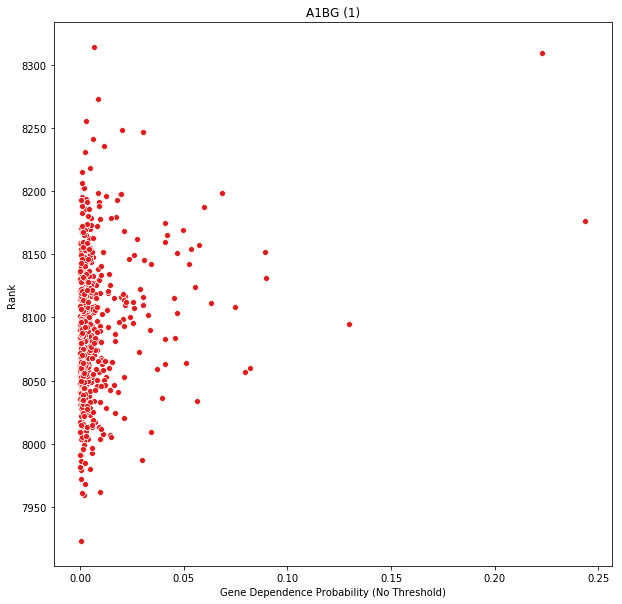

In [49]:
fig = sns.scatterplot(gene_dep_no_thresh['A1BG (1)'],ranks.loc['A1BG (1)'])
fig.set(xlabel='Gene Dependence Probability (No Threshold)', ylabel='Rank',title='A1BG (1)')

[Text(0,0.5,'Rank'),
 Text(0.5,0,'Gene Dependence Probability (No Threshold)'),
 Text(0.5,1,'A1BG (1)')]

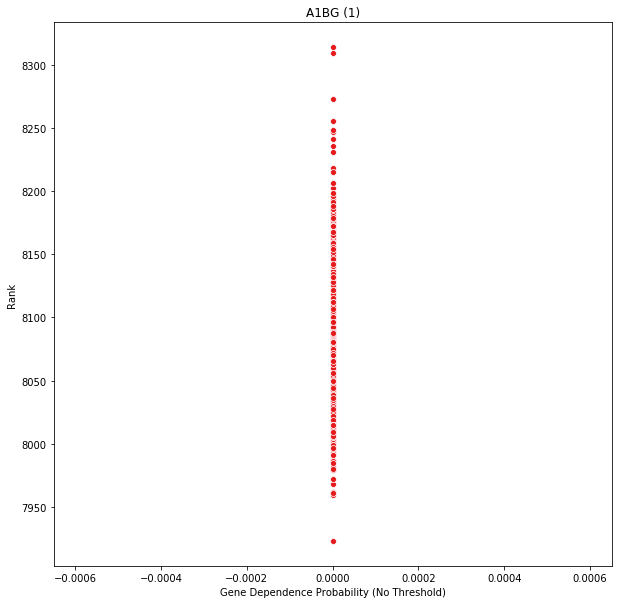

In [50]:
fig = sns.scatterplot(gene_dep['A1BG (1)'],ranks.loc['A1BG (1)'])
fig.set(xlabel='Gene Dependence Probability (No Threshold)', ylabel='Rank',title='A1BG (1)')

In [45]:
ranks

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A1CF (29974),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A2M (2),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A2ML1 (144568),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A3GALT2 (127550),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A4GALT (53947),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
A4GNT (51146),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
AAAS (8086),8081.5,16384.0,8061.5,16602.0,8089.0,8070.5,16105.0,8100.0,8107.5,8028.5,...,16314.0,16352.0,16505.0,16284.0,16747.0,8087.5,8172.0,16318.0,8036.5,8112.5
AACS (65985),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5
AADAC (13),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5


In [46]:
ranks.to_pickle('data/gene_dependency_ranks.pkl')

In [47]:
ranks.to_csv('data/gene_dependency_ranks.csv')

**Code rest stop: read in ranks**

In [48]:
ranks = pd.read_pickle('data/gene_dependency_ranks.pkl')

In [49]:
random.sample(list(ranks.index), 10)

['PARD3B (117583)',
 'C12orf71 (728858)',
 'CRYZ (1429)',
 'USF3 (205717)',
 'TRIM21 (6737)',
 'SHISA7 (729956)',
 'REEP6 (92840)',
 'LRTM2 (654429)',
 'KAT6A (7994)',
 'MYPN (84665)']

In [80]:
ranks.iloc[[51]]

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ABCB9 (23457),8081.5,8149.5,8061.5,8104.0,8089.0,8070.5,8048.5,8100.0,8107.5,8028.5,...,7961.0,8142.0,8065.5,8096.5,8121.5,8087.5,8172.0,8112.0,8036.5,8112.5


Visualizing Rank Distributions of 100 random genes from gene_dependency data


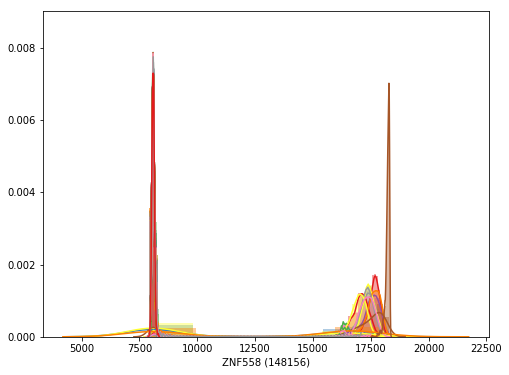

In [51]:
print('Visualizing Rank Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(ranks.index), 100):
    plt.rcParams["figure.figsize"] = (8,6)
    sns.distplot(ranks.loc[g].fillna(0))

In [52]:
from statistics import variance,mean,median

In [53]:
import numpy as np

In [54]:
median(ranks.loc['A4GALT (53947)'])

8089.5

In [55]:
ranks.loc['A4GALT (53947)'].std()

475.58897021860173

In [56]:
stats = pd.DataFrame(index=ranks.index,columns=['std','mean','median'])

In [57]:
stats['std']=[ranks.loc[g].std() for g in stats.index]

In [58]:
stats['mean']=[np.nanmean(ranks.loc[g]) for g in stats.index]

In [59]:
stats['median']=[median(ranks.loc[g]) for g in stats.index]

In [60]:
stats['max']=[max(ranks.loc[g]) for g in stats.index]

In [61]:
stats['min']=[min(ranks.loc[g]) for g in stats.index]

In [62]:
stats.to_pickle('data/gene_dependency_rank_stats.pkl')
stats.to_csv('data/gene_dependency_rank_stats.csv')

In [63]:
stats.head(10)

,std,mean,median,max,min
A1BG (1),54.179481,8091.3584,8089.5,8314.0,7923.0
A1CF (29974),356.471638,8105.5632,8089.5,16900.0,7923.0
A2M (2),54.179481,8091.3584,8089.5,8314.0,7923.0
A2ML1 (144568),54.179481,8091.3584,8089.5,8314.0,7923.0
A3GALT2 (127550),349.095481,8105.1560,8089.5,16713.0,7923.0
A4GALT (53947),475.588970,8117.8704,8089.5,16561.0,7923.0
A4GNT (51146),54.179481,8091.3584,8089.5,8314.0,7923.0
AAAS (8086),4270.826778,12374.9792,16016.0,18012.0,7962.0
AACS (65985),356.424380,8105.5912,8089.5,16899.0,7923.0
AADAC (13),54.179481,8091.3584,8089.5,8314.0,7923.0


In [64]:
stats.head(10).sort_values(by='std', ascending=False)

,std,mean,median,max,min
AAAS (8086),4270.826778,12374.9792,16016.0,18012.0,7962.0
A4GALT (53947),475.588970,8117.8704,8089.5,16561.0,7923.0
A1CF (29974),356.471638,8105.5632,8089.5,16900.0,7923.0
AACS (65985),356.424380,8105.5912,8089.5,16899.0,7923.0
A3GALT2 (127550),349.095481,8105.1560,8089.5,16713.0,7923.0
A1BG (1),54.179481,8091.3584,8089.5,8314.0,7923.0
A2M (2),54.179481,8091.3584,8089.5,8314.0,7923.0
A2ML1 (144568),54.179481,8091.3584,8089.5,8314.0,7923.0
A4GNT (51146),54.179481,8091.3584,8089.5,8314.0,7923.0
AADAC (13),54.179481,8091.3584,8089.5,8314.0,7923.0


In [65]:
highest_std_genes = stats.head(10).sort_values(by='std', ascending=False)[:10]
highest_std_genes

,std,mean,median,max,min
AAAS (8086),4270.826778,12374.9792,16016.0,18012.0,7962.0
A4GALT (53947),475.588970,8117.8704,8089.5,16561.0,7923.0
A1CF (29974),356.471638,8105.5632,8089.5,16900.0,7923.0
AACS (65985),356.424380,8105.5912,8089.5,16899.0,7923.0
A3GALT2 (127550),349.095481,8105.1560,8089.5,16713.0,7923.0
A1BG (1),54.179481,8091.3584,8089.5,8314.0,7923.0
A2M (2),54.179481,8091.3584,8089.5,8314.0,7923.0
A2ML1 (144568),54.179481,8091.3584,8089.5,8314.0,7923.0
A4GNT (51146),54.179481,8091.3584,8089.5,8314.0,7923.0
AADAC (13),54.179481,8091.3584,8089.5,8314.0,7923.0


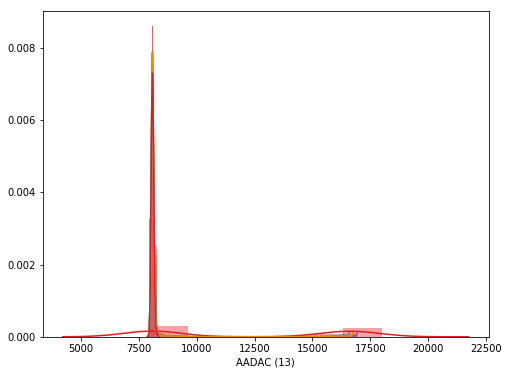

In [66]:
for g in list(highest_std_genes.index):
    sns.distplot(ranks.loc[g].fillna(0))

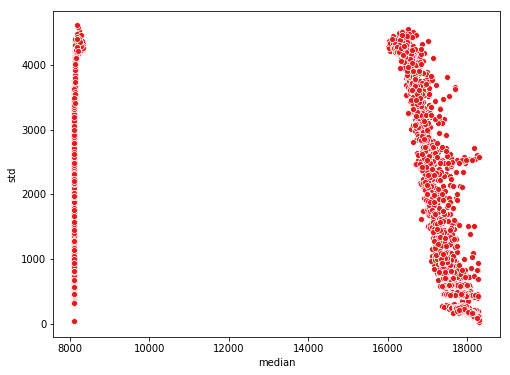

In [67]:
sns.scatterplot(x=stats['median'],y=stats['std'])

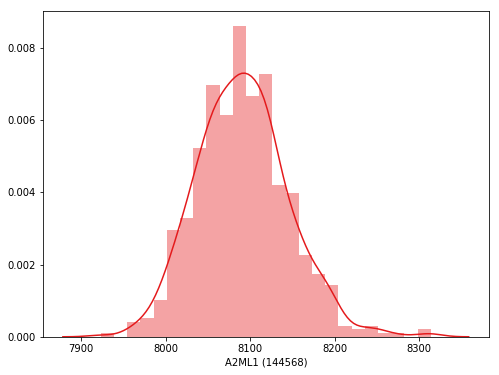

In [68]:
sns.distplot(ranks.loc['A2ML1 (144568)'].fillna(0))

**Mean of rank distribution**

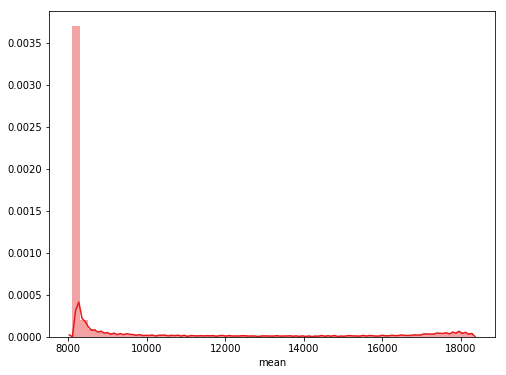

In [69]:
sns.distplot(stats['mean'].fillna(0))

**Median of rank distribution**

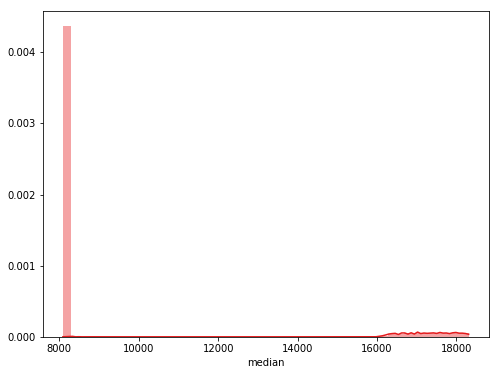

In [70]:
sns.distplot(stats['median'].fillna(0))

**Standard Deviation of rank distribution**

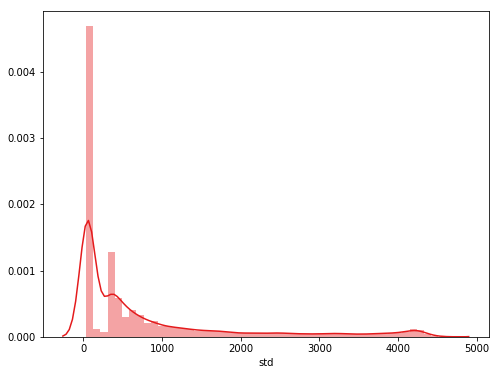

In [71]:
sns.distplot(stats['std'].fillna(0))

## Calculating Correlation Matrix for Cell Lines

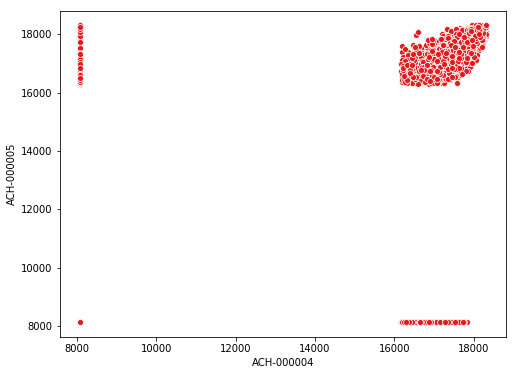

In [72]:
sns.scatterplot(x=ranks['ACH-000004'],y=ranks['ACH-000005'])

In [73]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.784016,0.749081,0.751760,0.741523,0.771338,0.744632,0.769744,0.778106,0.737752,...,0.765904,0.662471,0.767373,0.763435,0.757653,0.769670,0.719947,0.746315,0.745728,0.744644
ACH-000005,0.784016,1.000000,0.743446,0.744952,0.749865,0.752708,0.744488,0.737644,0.758199,0.735627,...,0.756980,0.666777,0.761340,0.758507,0.751105,0.765983,0.720597,0.744905,0.745658,0.743384
ACH-000007,0.749081,0.743446,1.000000,0.792204,0.779263,0.813665,0.787006,0.782037,0.804372,0.772991,...,0.781752,0.658813,0.788138,0.781114,0.800619,0.790753,0.755794,0.781967,0.776481,0.781142
ACH-000009,0.751760,0.744952,0.792204,1.000000,0.785155,0.820598,0.791519,0.782561,0.808678,0.771275,...,0.780204,0.692417,0.793911,0.795255,0.807018,0.805726,0.761620,0.787830,0.784390,0.788967
ACH-000011,0.741523,0.749865,0.779263,0.785155,1.000000,0.792831,0.772827,0.781618,0.781136,0.760667,...,0.772981,0.676444,0.776724,0.784587,0.787025,0.788101,0.749226,0.779098,0.793043,0.806407


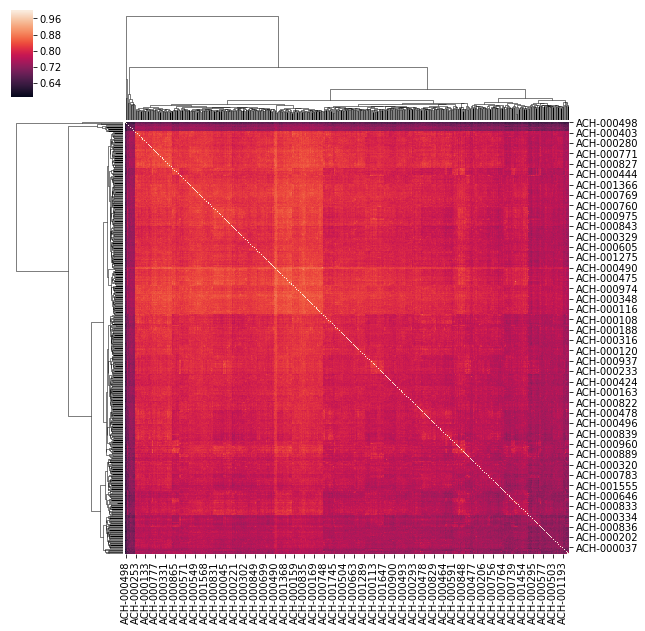

In [74]:
sns.clustermap(correlation_matrix)

# [This code continues on Google Collab here](https://colab.research.google.com/drive/1MJbvuvzVhiKs9dUJj78jkldzDDZl_W7c)

## Computing rank divergence correlations

### Mean rank divergence

In [73]:
rank_mean_divergence = ranks.copy()

In [74]:
for gene in list(rank_mean_divergence.index):
    rank_mean_divergence.loc[gene] = rank_mean_divergence.loc[gene] - stats['mean'][gene]

In [75]:
rank_mean_divergence.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),-2270.3760,4855.6240,1546.6240,119.6240,-3701.3760,2217.6240,386.6240,-1657.3760,5837.6240,-2422.3760,...,-2164.3760,4097.6240,2524.6240,-3277.3760,911.6240,-2026.3760,-2040.3760,5264.6240,5619.6240,321.6240
A1CF (29974),-1010.5984,-2956.5984,9.4016,1864.4016,-434.5984,-3335.5984,552.4016,2770.4016,1663.4016,-1348.5984,...,1464.4016,-1381.5984,-4809.5984,-2952.5984,-2217.5984,1181.4016,6446.4016,-973.5984,-2234.5984,1459.4016
A2M (2),3436.7072,-6038.2928,600.7072,-390.2928,-1670.2928,-5096.2928,-51.2928,-2471.2928,4012.7072,934.7072,...,2699.7072,261.7072,3994.7072,2668.7072,764.7072,2039.7072,4318.7072,2589.7072,-2838.2928,-4558.2928
A2ML1 (144568),4919.5664,659.5664,552.5664,1909.5664,-2501.4336,-2354.4336,-1515.4336,-681.4336,736.5664,1071.5664,...,2760.5664,2693.5664,-1292.4336,-758.4336,126.5664,1598.5664,3435.5664,-1838.4336,-1753.4336,-1457.4336
A3GALT2 (127550),-3031.8576,3614.1424,-3708.8576,-3453.8576,77.1424,-2287.8576,1172.1424,-845.8576,-395.8576,4545.1424,...,4682.1424,-4499.8576,265.1424,2766.1424,3539.1424,2565.1424,-4469.8576,42.1424,1530.1424,-285.8576


In [76]:
mean_divergence_correlation_matrix = rank_mean_divergence[rank_mean_divergence.columns].corr()

In [77]:
mean_divergence_correlation_matrix

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.142040,0.018189,0.008499,-0.056791,-0.009486,-0.039477,0.023293,-0.010230,0.000784,...,0.025867,0.041415,0.080834,0.019929,-0.045622,-0.024121,-0.010811,-0.019054,-0.013456,-0.072664
ACH-000005,0.142040,1.000000,0.003629,-0.048817,0.017768,-0.030134,-0.026138,0.011942,-0.022041,0.021418,...,0.030300,0.059719,-0.011439,0.008588,0.001091,-0.009170,0.018449,-0.001431,-0.041582,-0.019609
ACH-000007,0.018189,0.003629,1.000000,0.044182,0.002222,-0.023603,-0.054583,0.016541,-0.009250,0.002852,...,-0.028646,-0.013785,0.008668,0.000357,-0.034788,-0.065380,0.003019,0.004666,-0.025174,-0.031716
ACH-000009,0.008499,-0.048817,0.044182,1.000000,-0.063670,0.082531,-0.015077,0.020724,0.037034,-0.022031,...,-0.079016,-0.022713,-0.015058,0.004101,-0.068556,-0.022247,-0.024330,-0.047447,0.018139,0.028738
ACH-000011,-0.056791,0.017768,0.002222,-0.063670,1.000000,-0.074496,-0.032183,0.035054,-0.071340,-0.001785,...,-0.047749,0.031338,-0.030541,-0.033764,0.030090,-0.008491,0.024558,0.043019,0.014897,0.089382
ACH-000012,-0.009486,-0.030134,-0.023603,0.082531,-0.074496,1.000000,0.076913,-0.084668,-0.013362,-0.002640,...,-0.031285,-0.037348,-0.014067,-0.025053,0.003407,-0.003074,-0.053663,-0.079258,-0.018077,0.012932
ACH-000013,-0.039477,-0.026138,-0.054583,-0.015077,-0.032183,0.076913,1.000000,-0.101451,0.140409,-0.013401,...,-0.000915,-0.045124,0.037386,0.057331,0.085006,0.092904,-0.020376,-0.013253,0.021761,-0.029093
ACH-000014,0.023293,0.011942,0.016541,0.020724,0.035054,-0.084668,-0.101451,1.000000,-0.020934,-0.010456,...,0.000109,0.018065,-0.014858,-0.009852,-0.005819,0.017226,0.026184,-0.005412,-0.041813,0.049992
ACH-000015,-0.010230,-0.022041,-0.009250,0.037034,-0.071340,-0.013362,0.140409,-0.020934,1.000000,-0.093283,...,-0.029241,-0.068741,0.081664,0.068319,0.049181,0.011185,0.036525,-0.055664,0.025848,-0.027748
ACH-000017,0.000784,0.021418,0.002852,-0.022031,-0.001785,-0.002640,-0.013401,-0.010456,-0.093283,1.000000,...,-0.000086,0.005245,-0.012675,0.038165,-0.003354,0.045003,-0.021791,0.007109,-0.010022,-0.022828


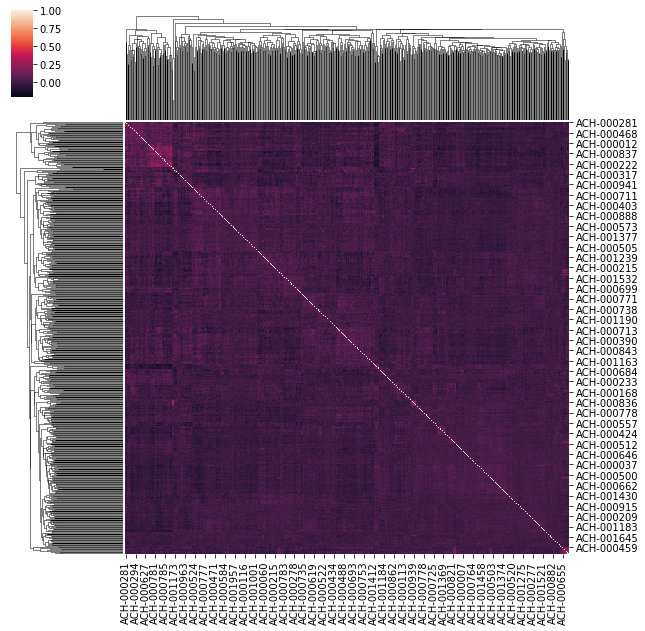

In [78]:
sns.clustermap(mean_divergence_correlation_matrix)

In [79]:
mean_divergence_correlation_matrix.to_pickle('data/mean_divergence_correlation_matrix.pkl')

In [80]:
mean_divergence_correlation_matrix.to_csv('data/mean_divergence_correlation_matrix.csv')

### Median Rank Divergence

In [81]:
rank_median_divergence = ranks.copy()

In [82]:
for gene in list(rank_median_divergence.index):
    rank_median_divergence.loc[gene] = rank_median_divergence.loc[gene] - stats['median'][gene]

In [83]:
rank_median_divergence.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),-1596.0,5530.0,2221.0,794.0,-3027.0,2892.0,1061.0,-983.0,6512.0,-1748.0,...,-1490.0,4772.0,3199.0,-2603.0,1586.0,-1352.0,-1366.0,5939.0,6294.0,996.0
A1CF (29974),-529.0,-2475.0,491.0,2346.0,47.0,-2854.0,1034.0,3252.0,2145.0,-867.0,...,1946.0,-900.0,-4328.0,-2471.0,-1736.0,1663.0,6928.0,-492.0,-1753.0,1941.0
A2M (2),3139.0,-6336.0,303.0,-688.0,-1968.0,-5394.0,-349.0,-2769.0,3715.0,637.0,...,2402.0,-36.0,3697.0,2371.0,467.0,1742.0,4021.0,2292.0,-3136.0,-4856.0
A2ML1 (144568),5650.0,1390.0,1283.0,2640.0,-1771.0,-1624.0,-785.0,49.0,1467.0,1802.0,...,3491.0,3424.0,-562.0,-28.0,857.0,2329.0,4166.0,-1108.0,-1023.0,-727.0
A3GALT2 (127550),-3092.0,3554.0,-3769.0,-3514.0,17.0,-2348.0,1112.0,-906.0,-456.0,4485.0,...,4622.0,-4560.0,205.0,2706.0,3479.0,2505.0,-4530.0,-18.0,1470.0,-346.0


ValueError: cannot convert float NaN to integer

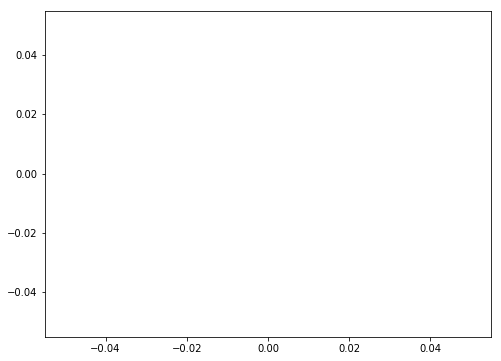

In [85]:
sns.distplot(rank_median_divergence['ACH-000004']);

In [86]:
median_divergence_correlation_matrix = rank_median_divergence[rank_median_divergence.columns].corr()

In [87]:
median_divergence_correlation_matrix

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.196588,0.074416,0.054701,-0.004593,0.029332,-0.004293,0.084621,0.030017,0.049228,...,0.069547,0.112026,0.127688,0.064555,0.002227,0.012252,0.050623,0.031689,0.017340,-0.026443
ACH-000005,0.196588,1.000000,0.087106,0.037166,0.092211,0.050268,0.053526,0.074631,0.058673,0.102878,...,0.110828,0.143140,0.074439,0.088976,0.070345,0.076281,0.103287,0.080372,0.042316,0.073646
ACH-000007,0.074416,0.087106,1.000000,0.129817,0.084628,0.064948,0.033270,0.072150,0.076864,0.093355,...,0.064505,0.083854,0.098487,0.087158,0.042801,0.029567,0.095752,0.093230,0.064109,0.069506
ACH-000009,0.054701,0.037166,0.129817,1.000000,0.017085,0.153426,0.060213,0.064645,0.112483,0.063822,...,0.012534,0.076677,0.073055,0.084241,0.004015,0.062267,0.071162,0.041211,0.092386,0.120337
ACH-000011,-0.004593,0.092211,0.084628,0.017085,1.000000,-0.001293,0.035370,0.081410,0.002826,0.075305,...,0.034598,0.121965,0.050889,0.039936,0.088539,0.065250,0.108813,0.116744,0.080138,0.168624
ACH-000012,0.029332,0.050268,0.064948,0.153426,-0.001293,1.000000,0.133117,-0.046480,0.055282,0.075419,...,0.049071,0.066089,0.068799,0.048999,0.058633,0.071275,0.039785,0.004130,0.043802,0.100259
ACH-000013,-0.004293,0.053526,0.033270,0.060213,0.035370,0.133117,1.000000,-0.068242,0.195661,0.061752,...,0.072629,0.060391,0.115564,0.123194,0.131584,0.153891,0.069647,0.062271,0.075982,0.057659
ACH-000014,0.084621,0.074631,0.072150,0.064645,0.081410,-0.046480,-0.068242,1.000000,0.017217,0.036910,...,0.042856,0.091175,0.035436,0.034095,0.038424,0.049648,0.085060,0.043199,-0.014486,0.089422
ACH-000015,0.030017,0.058673,0.076864,0.112483,0.002826,0.055282,0.195661,0.017217,1.000000,-0.006198,...,0.050192,0.035536,0.157242,0.137259,0.103567,0.082866,0.122978,0.026302,0.087917,0.063443
ACH-000017,0.049228,0.102878,0.093355,0.063822,0.075305,0.075419,0.061752,0.036910,-0.006198,1.000000,...,0.087135,0.103066,0.077085,0.117817,0.066386,0.125412,0.073346,0.091309,0.066853,0.073122


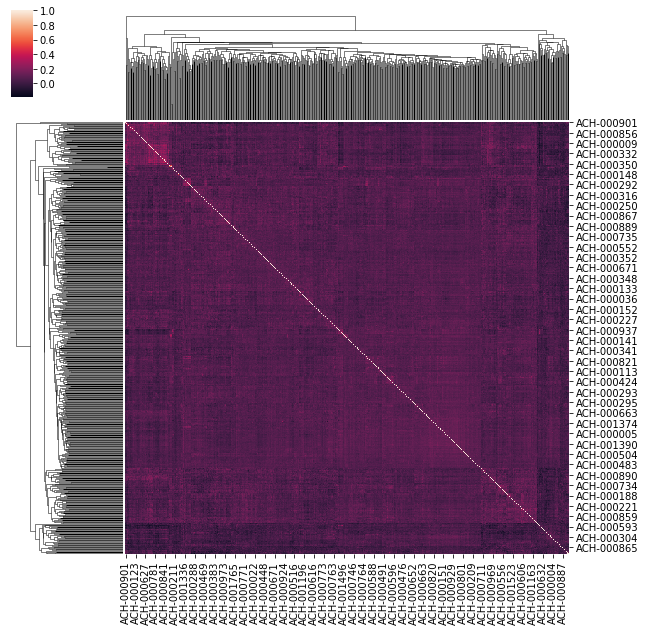

In [88]:
sns.clustermap(median_divergence_correlation_matrix)

In [89]:
median_divergence_correlation_matrix.to_pickle('data/median_divergence_correlation_matrix.pkl')

In [90]:
median_divergence_correlation_matrix.to_csv('data/median_divergence_correlation_matrix.csv')

## Grouping Cell Lines by Cancer Type

In [91]:
disease_list = list(metadata['Primary Disease'].unique())

In [92]:
cell_line_disease_groups = {}
for d in disease_list:
    cell_line_disease_groups[d]=list(metadata[metadata['Primary Disease']==d].index)

In [93]:
metadata.head(10)

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC
ACH-000007,LS513_LARGE_INTESTINE,LS513,907795.0,569.0,Colon/Colorectal Cancer,Colon Carcinoma,Male,ATCC
ACH-000009,C2BBE1_LARGE_INTESTINE,C2BBe1,910700.0,2104.0,Colon/Colorectal Cancer,Colon Adenocarcinoma,Male,ATCC
ACH-000011,253J_URINARY_TRACT,253J,NaN,NaN,Bladder Cancer,Carcinoma,NaN,KCLB
ACH-000012,HCC827_LUNG,HCC827,1240146.0,354.0,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Adenocarci...",Female,ATCC
ACH-000013,ONCODG1_OVARY,ONCO-DG-1,NaN,NaN,Ovarian Cancer,Adenocarcinoma,Female,DSMZ
ACH-000014,HS294T_SKIN,Hs 294T;A101D;Hs 294.T,NaN,NaN,Skin Cancer,Melanoma,Male,ATCC
ACH-000015,NCIH1581_LUNG,NCI-H1581;NCI-H2077,908471.0,1237.0,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Large Cell...",Male,ATCC


In [94]:
metadata[metadata['Primary Disease']=='Prostate Cancer']

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000115,VCAP_PROSTATE,VCaP,1299075.0,2154.0,Prostate Cancer,Adenocarcinoma,Male,ATCC


In [95]:
cell_line_disease_groups

{'Leukemia': ['ACH-000004',
  'ACH-000005',
  'ACH-000045',
  'ACH-000070',
  'ACH-000782',
  'ACH-000938',
  'ACH-000113',
  'ACH-000146',
  'ACH-000960',
  'ACH-000168',
  'ACH-000183',
  'ACH-000198',
  'ACH-000263',
  'ACH-000294',
  'ACH-000295',
  'ACH-000326',
  'ACH-000336',
  'ACH-000937',
  'ACH-000362',
  'ACH-000363',
  'ACH-000387',
  'ACH-000406',
  'ACH-000487',
  'ACH-000498',
  'ACH-000557',
  'ACH-000604',
  'ACH-000770',
  'ACH-000953',
  'ACH-000983',
  'ACH-001737',
  'ACH-001735',
  'ACH-001736',
  'ACH-000151'],
 'Colon/Colorectal Cancer': ['ACH-000007',
  'ACH-000009',
  'ACH-000202',
  'ACH-000253',
  'ACH-000296',
  'ACH-000350',
  'ACH-000381',
  'ACH-000403',
  'ACH-000421',
  'ACH-000467',
  'ACH-000470',
  'ACH-000491',
  'ACH-000552',
  'ACH-000651',
  'ACH-000683',
  'ACH-000820',
  'ACH-000926',
  'ACH-000935',
  'ACH-000943',
  'ACH-000950',
  'ACH-000957',
  'ACH-000958',
  'ACH-000963',
  'ACH-000969',
  'ACH-000986',
  'ACH-001061',
  'ACH-001454',


In [96]:
import json

In [97]:
with open('data/cell_line_disease_groups.json', 'w') as fp:
    json.dump(cell_line_disease_groups, fp)

In [98]:
disease_ranks = {}

In [99]:
for d in disease_list:
    disease_ranks[d]=ranks.filter(cell_line_disease_groups[d])

In [100]:
cell_line_disease_groups['Prostate Cancer']

['ACH-000115']

In [101]:
disease_ranks['Prostate Cancer']

,ACH-000115
A1BG (1),9428.0
A1CF (29974),744.0
A2M (2),10176.0
A2ML1 (144568),972.0
A3GALT2 (127550),7315.0
A4GALT (53947),10926.0
A4GNT (51146),232.0
AAAS (8086),5962.0
AACS (65985),1913.0
AADAC (13),711.0


In [102]:
top_10_disease_list= list(diseases.tail(10).index)

In [103]:
disease_group_correlations = {}

In [104]:
for d in top_10_disease_list:
    disease_group_correlations[d]=disease_ranks[d].corr()

In [105]:
#for d in top_10_disease_list:
    #sns.clustermap(disease_group_correlations[d]).fig.suptitle(d)

In [106]:
disease_group_median_ranks = pd.DataFrame(columns=disease_list,index=genes)

NameError: name 'genes' is not defined

In [ ]:
disease_group_median_ranks

In [ ]:
for d in disease_list:
    disease_group_median_ranks[d]=disease_ranks[d].median(axis=1)

In [ ]:
disease_group_median_ranks

In [ ]:
sns.scatterplot(disease_group_median_ranks['Prostate Cancer'],disease_group_median_ranks['Cervical Cancer'])

In [ ]:
disease_group_median_ranks.to_pickle('data/disease_group_median_ranks.pkl')

In [ ]:
disease_group_median_ranks.to_csv('data/disease_group_median_ranks.csv')

In [ ]:
sns.clustermap(disease_group_median_ranks.corr(), cmap='mako')

In [ ]:
stats.head(10)

In [ ]:
group_median_rank_divergence=disease_group_median_ranks.copy()

In [ ]:
group_median_rank_divergence

In [ ]:
disease_group_median_ranks['Prostate Cancer']['A1CF (29974)']

In [ ]:
for gene in genes:
    plt.figure()
    sns.distplot(disease_ranks['Lung Cancer'].loc[gene].dropna())

In [ ]:
stats['median']['A1CF (29974)']

In [ ]:
group_median_rank_divergence['Prostate Cancer']=[disease_group_median_ranks['Prostate Cancer'][g]-stats['median'][g] for g in genes]

In [ ]:
group_median_rank_divergence

In [ ]:
for gene in list(rank_mean_divergence.index):
    group_median_rank_divergence.loc[gene] = disease_group_median_ranks.loc[gene] - stats['median'][gene]

In [ ]:
group_median_rank_divergence

In [ ]:
sns.clustermap(group_median_rank_divergence.corr(), cmap='mako')

In [ ]:
sns.scatterplot(group_median_rank_divergence['Pancreatic Cancer'],group_median_rank_divergence['Lung Cancer'])

## Cell Line Ranks by Gene Dependency

In [ ]:
cell_line_ranks = pd.DataFrame(index=list(gene_dep.index), columns=gene_dep.columns)

In [ ]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep[gene].rank().head(10)

In [ ]:
# Calculate gene dependency ranks for each cell line
start_time = datetime.now()
i=1
genes=list(gene_dep.columns)
l=len(genes)
for gene in genes:
    print('analyzing gene',gene,i,"of",l)
    cell_line_ranks[gene]=gene_dep[gene].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

In [ ]:
cell_line_ranks.to_pickle('data/cell_line_ranks.pkl')

In [ ]:
cell_line_ranks = pd.read_pickle('data/cell_line_ranks.pkl')

In [ ]:
cell_line_ranks.head(10)

In [ ]:
cell_line_ranks.shape

## Gene Correlation Matrix

In [ ]:
gene_correlation = cell_line_ranks[cell_line_ranks.columns].corr()

In [ ]:
gene_correlation.head(5)

In [ ]:
gene_correlation.to_pickle('data/gene_correlation.pkl')

In [ ]:
gene_correlation.to_csv('data/gene_correlation.csv')

In [ ]:
def convert_matrix_to_stack(matrix):
  # This is a symmetric matrix, so we only take the upper triangle, using `np.triu`
  stack = pd.DataFrame(matrix.mask(np.triu(np.ones(matrix.shape)).astype(bool)).stack()).reset_index().rename(columns={'level_0':'x','level_1':'y',0:'measure'})
  # We return a stack, where each row is an edge between features, with a weight from the matrix
  return stack

In [ ]:
gene_stack = convert_matrix_to_stack(gene_correlation)

In [ ]:
gene_stack.to_pickle('data/gene_stack.pkl')

In [ ]:
def filter_stack_by_threshold(stack,threshold):
    # What was our original edge count?
    orig_size = stack.shape[0]
    # Create a new stack of edges, filtering the ones that don't make the threshold cut
    thresh_stack = stack[stack['measure']>np.percentile(stack['measure'], threshold)]
    # What's our new edge count?
    thresh_size = thresh_stack.shape[0]
    # Let's see a histogram of our weight distributions after setting the threshold
    print("Removed",orig_size-thresh_size,"edges from stack. Original edge count:",orig_size,"| New edge count:",thresh_size)
    return thresh_stack

In [ ]:
thresh_gene_stack = filter_stack_by_threshold(gene_stack,99.9)

In [ ]:
thresh_gene_stack.to_pickle('data/thresh_gene_stack.pkl')

In [ ]:
thresh_gene_stack.to_csv('data/thresh_gene_stack.csv')

In [ ]:
thresh_gene_stack.sort_values(by='measure',ascending=False).head(10)